## Picture Compression Project - Iwas Iwas

<img src="error.png"/>

In a coloured image, each pixel is of size 3 bytes (RGB), where each colour can have intensity values from 0 to 255. Image compression is a type of data compression applied to digital images, to reduce their cost for storage or transmission.

This project shows how this can be done using the KMeans Clustering technique. 

Let's start by importing libraries, loading the RGB values of each pixel and displaying the image that needs to be compressed.

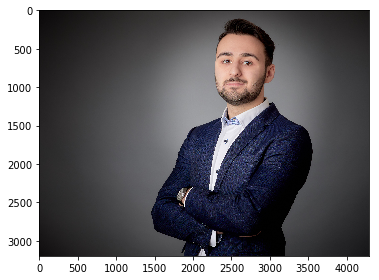

In [2]:
%matplotlib inline
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

image = io.imread('orig_picture.jpg')[:, :, :3] #[R,G,B];leave out Alpha (Transparancy)
io.imshow(image)
plt.show()

Let's see what the shape and size of the image look like.

In [34]:
statinfo = os.stat('orig_picture.jpg')

print(image.shape) #Pixel Height, Pixel Width, Dimensions (R,G,B)
print('Picture Size: {} MB'.format(statinfo.st_size/1000000))

(3196, 4293, 3)
Picture Size: 1.684489 MB


KMeans needs an array where all the entries are next to each other, not interleaved. Let's reshape the Array to combine all height and width pixel.

We can restore the shape after the clustering is done.

In [3]:
image_reshaped = image.reshape(-1, 3) #3196x4293 pixel  #combine heightxwidth pixel for kmeans, each row has R-G-B pixel

print("Before reshaping: {}".format(image.shape))
print("After reshaping:  {}".format(image_reshaped.shape))

Before reshaping: (3196, 4293, 3)
After reshaping:  (13720428, 3)


**Applying KMeans Clustering**

K-means clustering will group similar colors into ‘k’ clusters of different colors (RGB values). 
Each cluster centroid is the representative of the three-dimensional color vector (RGB) of its respective cluster.

Let's build a KMeans classifier that creates 32 cluster center (centroids) that represent 32 color values (RGB). This will be the only colors left in the image at the end of this project.

In [12]:
model = KMeans(n_clusters = 32, n_init = 1) #32 centroids / color values [R,G,B]
model.fit(image_reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=32, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Take a look at the cluster centers/centroids the model has created.

In [13]:
print(model.cluster_centers_)

[[  6.35501538   5.42500146  20.64308699]
 [107.72159529 107.8408956  110.94993178]
 [ 57.83560449  57.22341762  58.58731901]
 [227.30240264 183.12598393 164.18017721]
 [139.92955466 140.15486198 143.79532425]
 [ 41.10914381  39.58227789  40.31941322]
 [ 73.67972088  73.42582278  75.35265609]
 [215.23592439 214.45106702 222.07270442]
 [ 28.13731597  33.51293182  65.05282923]
 [  1.66060028   0.92934881   2.77341066]
 [189.75564242 140.42047115 122.45604362]
 [ 81.4520019   81.22622327  83.46125778]
 [153.30346482 153.8712052  158.2081029 ]
 [133.62290443  91.77493194  77.20768257]
 [ 53.64609426  59.86930657  97.17793065]
 [ 49.36807674  48.15871468  48.89948569]
 [117.57857309 117.81944926 121.20123816]
 [ 18.39563458  23.18808037  51.89178962]
 [161.48289219 115.49923487  99.70174306]
 [ 72.37336853  80.0358117  121.1933568 ]
 [ 65.84130339  65.42575536  67.14942887]
 [ 32.7274827   30.72537639  31.2987453 ]
 [234.47137666 234.07999125 239.86949697]
 [ 96.82289085  64.04116083  52.66

For each color value/pixel in our image array, the centroid nearest to the values has been assigned as the label.

In [22]:
print(model.labels_)

[ 9  9  9 ... 24 24 24]


In the next step, let's convert the RGB values for the cluster centers back to integers and go over each pixel to assign the associated cluster center/ color that has been labeled for that pixel.

In [40]:
colors = model.cluster_centers_.astype("uint8") 
#u => unsigned => no pre-signs +-; integer; 8 bit (0-255)
pixels = model.labels_

new_pixels = []
for pixel in pixels:
    new_pixels.append(colors[pixel])

To reshape it back to the original shape with height and width pixels, we have to convert the list with the new RGB/Pixel values to a numpy array. Let's do that and reshape the array back to its original shape.

In [46]:
new_pixels = np.array(new_pixels) #convert to numpy array
restored = new_pixels.reshape(image.shape) #image.shape = (3196, 4293, 3)
print('Before reshaping: {}'.format(new_pixels.shape))
print('Restored Shape to Original: {}'.format(restored.shape))

Before reshaping: (13720428, 3)
Restored Shape to Original: (3196, 4293, 3)


## New GitHub Profile Picture!

Finally, let's print the compressed picture and check out if we managed to achieve a size below 1 MB.

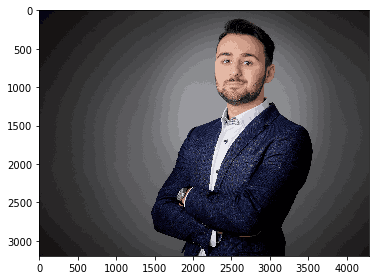

Picture size before compression 1.684489 MB
Picture size after compression: 0.870438 MB


In [48]:
io.imshow(restored)
plt.show()

io.imsave("./test.jpg", restored)
statinfo_new = os.stat('test.jpg')
print('Picture size before compression {} MB'.format(statinfo.st_size/1000000))
print('Picture size after compression: {} MB'.format(statinfo_new.st_size/1000000))

Success! 

Check out my GitHub profile picture for a clearer result.

https://github.com/iwasscience